## Surrogates

In [45]:
using Surrogates, LinearAlgebra, StaticArrays, Plots

   Resolving package versions...


  No Changes to `~/Repositories/Julia_by_Notebooks/Project.toml`


  No Changes to `~/Repositories/Julia_by_Notebooks/Manifest.toml`


## Inteprolation

In [76]:
# Points 
num_points = 100
xpoints = [rand() for x in 1:num_points]
min_x, max_x = extrema(xpoints)
ypoints = sort!([rand() for y in 1:num_points]) 
min_y, max_y = extrema(ypoints)
lb = [min_x, min_y]
ub = [max_x, max_y]
points = [SVector(xpoints[i], ypoints[i]) for i in 1:num_points  ]

# Field to interpolate
scalar_field(x,y) = 2x*y
scalar_field_values = [scalar_field(p...) for p in points]

# RBS
itp = RadialBasis(points,scalar_field_values,lb,ub, rad = cubicRadial())
itp

(::RadialBasis{Surrogates.var"#3#4", Int64, Vector{SVector{2, Float64}}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Transpose{Float64, Vector{Float64}}, Float64, Bool}) (generic function with 1 method)

In [81]:
# Generate grid points for evaluation
ngrid = 50
xgrid = range(min_x, max_x, length = ngrid)
ygrid = range(min_y, max_y, length = ngrid)
grid_points = [SVector(x, y) for x in xgrid, y in ygrid]

# Compute interpolated values and exact values
interpolated_values = [itp(p) for p in grid_points]
exact_values = [scalar_field(p...) for p in grid_points]

# Compute error between interpolated values and exact values
error = interpolated_values .- exact_values
relative_error = abs.(interpolated_values .- exact_values) ./ abs.(exact_values)

50×50 Matrix{Float64}:
 660.089     8.54411    1.9917      0.64623     …  0.0662152    0.0917614
 168.58      1.43768    0.00787856  0.124381       0.0219532    0.0323957
  65.5868    0.300823   0.153963    0.115409       0.00938703   0.0157343
  33.1705    0.13509    0.063826    0.0325907      0.00356655   0.00800017
  20.0614    0.113788   0.00356645  0.00733665     0.000566526  0.00387508
  12.6289    0.0752429  0.00610202  0.0116877   …  0.000813276  0.00171315
   7.3986    0.0244725  0.00498946  0.00366911     0.00122873   0.000701044
   3.59114   0.0213586  0.0184435   0.00412063     0.00116007   0.000311183
   1.07801   0.0510728  0.0265738   0.00816537     0.000876878  0.0002339
   0.101659  0.0588561  0.027073    0.00883848     0.00053771   0.000287879
   ⋮                                            ⋱               
   5.23301   0.109832   0.0455494   0.0235061      0.00139612   0.00219334
   6.10193   0.128021   0.0532486   0.0276506      0.00162617   0.00253842
   7.06563   

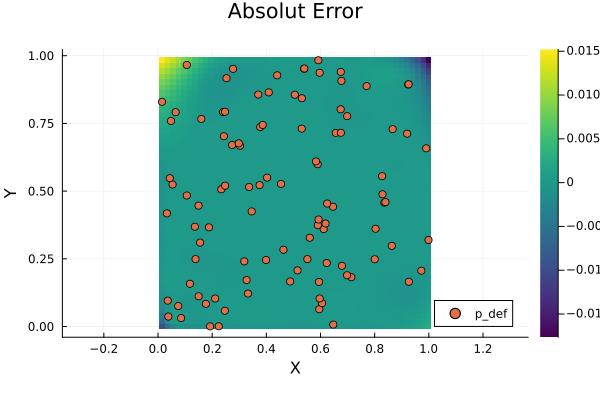

In [85]:
heatmap(xgrid, ygrid, error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Absolut Error")
scatter!(getindex.(points,1), getindex.(points,2), marker = :circle, label="p_def")

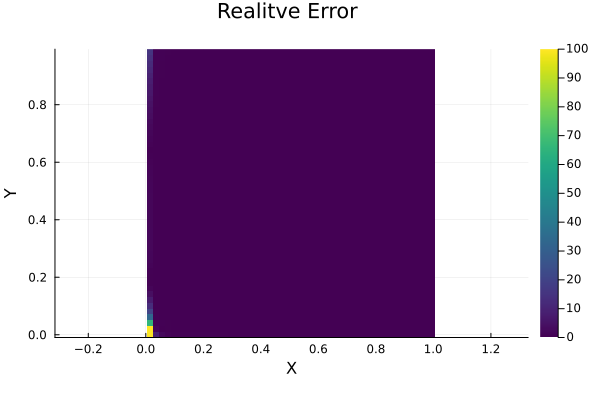

In [86]:
heatmap(xgrid, ygrid, relative_error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Realitve Error ", clims = (0, 100))
